Processing *wide* Image with Dimensions: (598, 1092)
Radiometric Correction Ongoing
Smile Correction Ongoing
Destriping Correction Ongoing
L1b.nc file already exists. Not creating it.
Getting Projection Data without lat/lon correction =========================================
Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [62.451473, 65.84612, 6.6196504, 10.3140335]
    using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
    Area covered by image: 40830300644.02145 m^2 = 40830.300644021445 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1280497 / 2165618
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 11
      Starting band 61
      Starting band 50
      Starting band 31
      Done with band 31      Done with band 61
      Done with band 50
      Done with band 11

Done RGB/RGBA Geotiff
RGBA Tif File:  frohavet_2024-05-16_0942Z-rgba

/Users/sivertbakken/anaconda3/envs/hypsoenv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sivertbakken/anaconda3/envs/hypsoenv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sivertbakken/anaconda3/envs/hypsoenv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Tryin

RGBA Tif File:  frohavet_2024-05-16_0942Z-l1b-rgba_8bit.tif
Full L2 Tif File:  frohavet_2024-05-16_0942Z-l1b-full_L2_6SV1.tif
Full L1C Tif File:  frohavet_2024-05-16_0942Z-l1b-full_L1C.tif
2D Array Plot Range:  [0.01, 100]


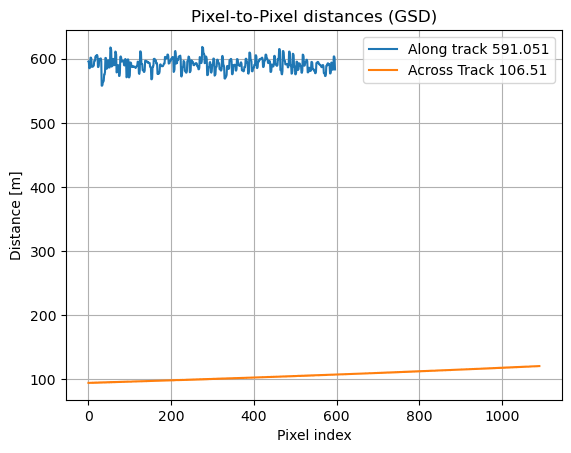

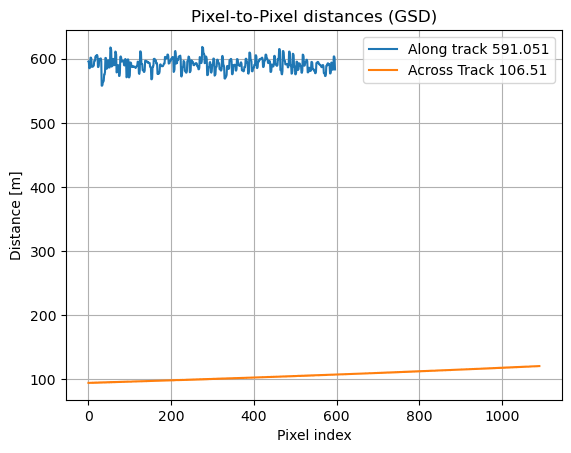

/Users/sivertbakken/anaconda3/envs/hypsoenv/lib/python3.9/site-packages/cartopy/crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
/Users/sivertbakken/anaconda3/envs/hypsoenv/lib/python3.9/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
/Users/sivertbakken/anaconda3/envs/hypsoenv/lib/python3.9/site-packages/cartopy/crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,


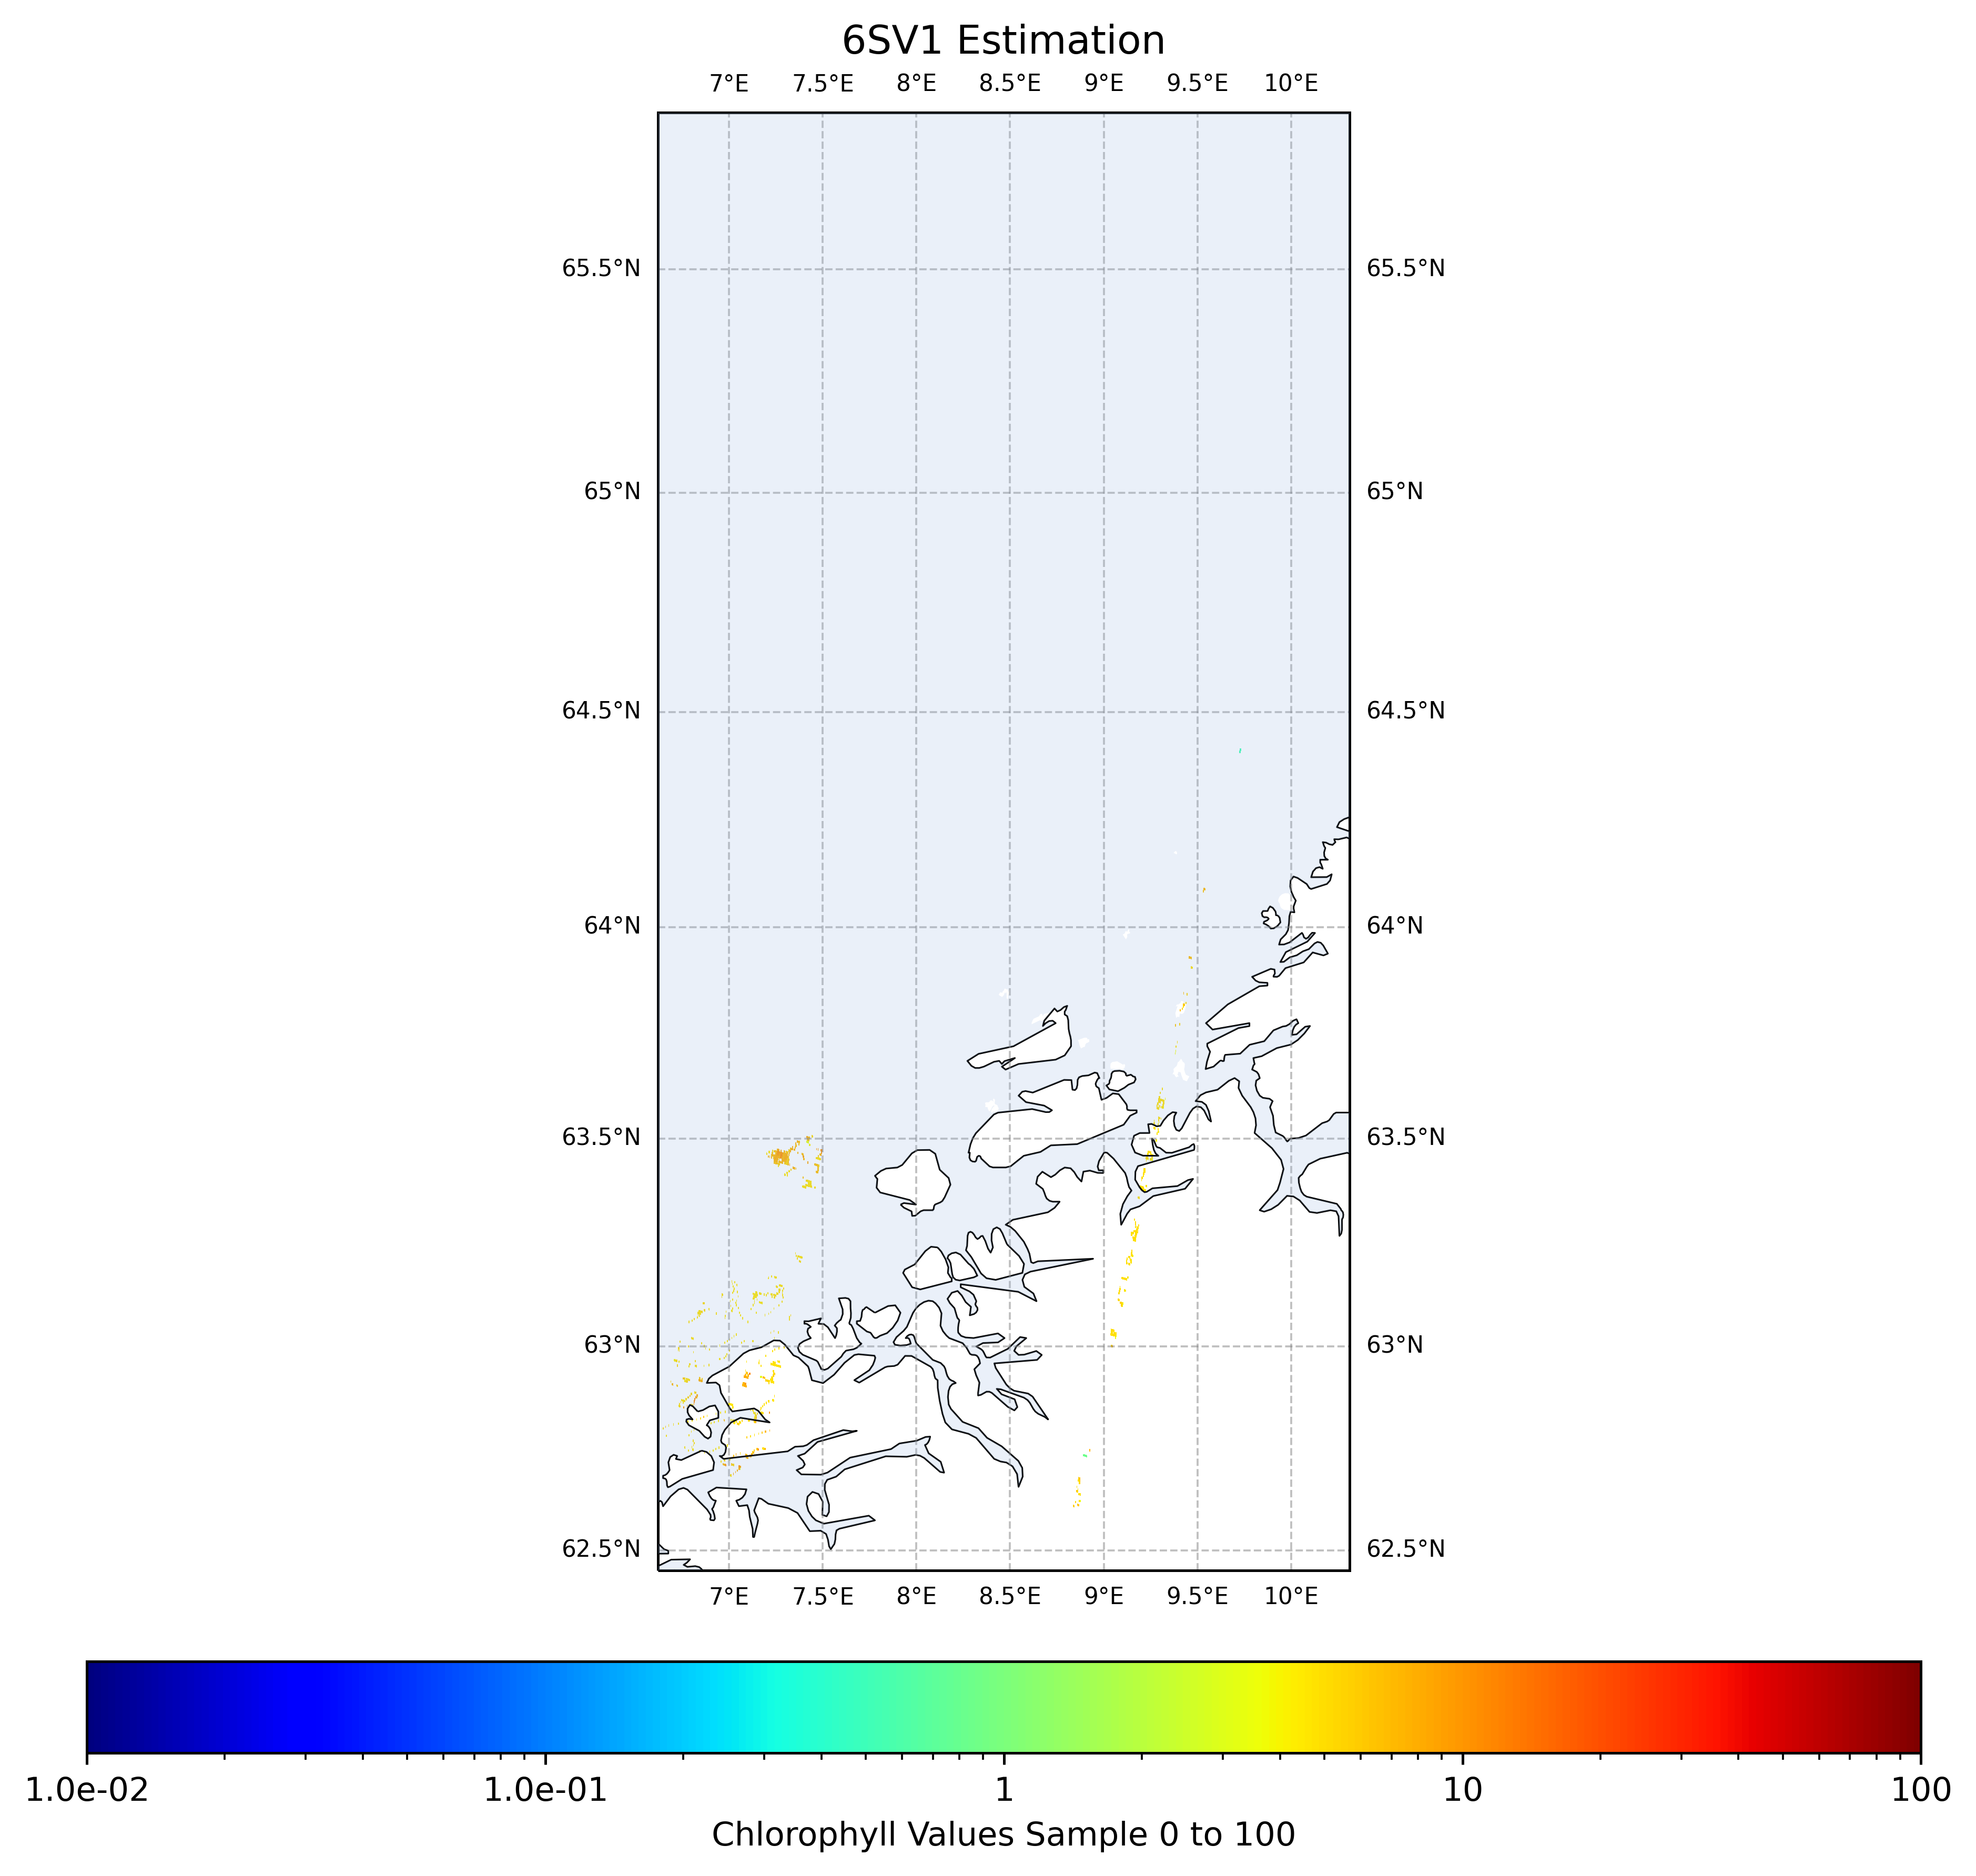

In [1]:
import os
import hypso as h

from hypso.experimental.chlorophyll import start_chl_estimation
from hypso.classification.water import ndwi_watermask
from hypso.georeference import generate_full_geotiff as gfg
from hypso.experimental.chlorophyll import start_chl_estimation

# Get files as list
# Get parent directory
parentDir = os.path.dirname(os.getcwd())

filePath = os.path.join(parentDir,'data', 'frohavet')
# filePath = "/path/to/your/folder/containing/hypso/files"
model_path = os.path.join(parentDir,'models','model_6sv1_aqua_tuned.joblib')
# model_path = "/path/to/your/model"

# Get files as list
files = os.listdir(filePath)

for f in files:
    if not f.endswith('.nc'):
        continue
    h_file = h.Hypso(os.path.join(filePath, f))


atmos_params = {
    'aot550': 0.0580000256
}

# AOT550 parameter gotten from: https://giovanni.gsfc.nasa.gov/giovanni/
# In this case, if you force reload, you would delete L1C so we set it to False
h_file.create_geotiff(product="L2-6SV1", force_reload=False, atmos_dict=atmos_params)

h_file.find_existing_l2_cube()

gfg(h_file)
ndwi_watermask(h_file)

start_chl_estimation(sat_obj=h_file, model_path=model_path)

from hypso.plot import plot_array_overlay
# Plot Array on Map
plot_array_overlay(h_file,h_file.chl, plotTitle="6SV1 Estimation",cbar_title="Chlorophyll Values Sample 0 to 100", min_value=0.01, max_value=100)